In [1]:
import time
start_time=time.time()

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import sys
import os
from PIL import Image
import seaborn as sns
from scipy import interpolate
import json
import turbustat.statistics as tss
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

Brillo emisión

Text(0.5, 1.0, 'H$_{α}$ Flux')

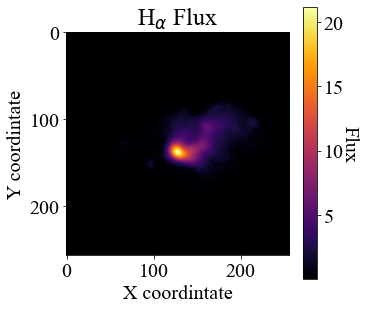

In [3]:
#ARCHIVO
FitsFile= 'Obs/TAURUS.HV.Ha.Peak'
hdul=fits.open(FitsFile + '.fits')
fig, ax = plt.subplots(figsize=(5, 5))


image_data=hdul[0].data
plt.imshow(image_data, cmap='inferno')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15)  
plt.title('H$_{α}$ Flux')

In [4]:
#TABLA DATOS
flx=hdul[0].data
df=pd.DataFrame(flx)
dffx=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'I'})
dffx.describe()

,Y,X,I
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,3.528891e-01
std,73.900834,73.900834,1.449902e+00
min,0.000000,0.000000,5.289438e-09
25%,63.750000,63.750000,5.289438e-09
50%,127.500000,127.500000,5.289438e-09
75%,191.250000,191.250000,5.289438e-09
max,255.000000,255.000000,2.115935e+01


Velocidad Radial

Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

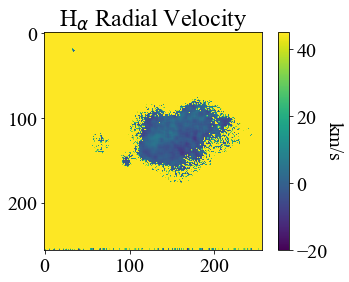

In [5]:
#ARCHIVO
FitsFile= FitsFile= 'Obs/TAURUS.HV.Ha.RV'
#FitsFile= 'n604halphasigma'
hdul=fits.open(FitsFile + '.fits')
#IMAGEN
image_data=hdul[0].data
plt.imshow(image_data, cmap='viridis')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.clim(-20,45) 
plt.title('H$_{α}$ Radial Velocity')
#plt.savefig('TAURUS/'+reg+'RVH.png')

In [6]:
#TABLA DATOS
vel=hdul[0].data
df=pd.DataFrame(vel)
dfvr=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'RV'})
dfvr.describe()

,Y,X,RV
count,65536.000000,65536.000000,65536.000000
mean,127.500000,127.500000,108.074671
std,73.900834,73.900834,40.049776
min,0.000000,0.000000,-15.575094
25%,63.750000,63.750000,122.940002
50%,127.500000,127.500000,122.940002
75%,191.250000,191.250000,122.940002
max,255.000000,255.000000,126.898609


In [7]:
data=dfvr
data['I']=dffx.I
data.describe()

,Y,X,RV,I
count,65536.000000,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,108.074671,3.528891e-01
std,73.900834,73.900834,40.049776,1.449902e+00
min,0.000000,0.000000,-15.575094,5.289438e-09
25%,63.750000,63.750000,122.940002,5.289438e-09
50%,127.500000,127.500000,122.940002,5.289438e-09
75%,191.250000,191.250000,122.940002,5.289438e-09
max,255.000000,255.000000,126.898609,2.115935e+01


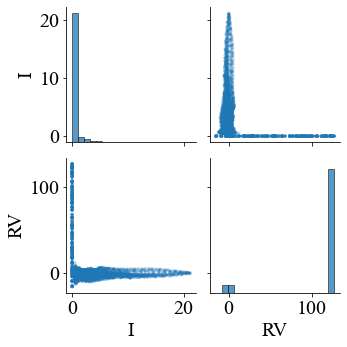

In [8]:
sns.pairplot(data, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

Ajuste de datos

In [9]:
mI=(data.I>data.I.mean()+0.5*data.I.std())&(data.X>109)
data=data[mI]

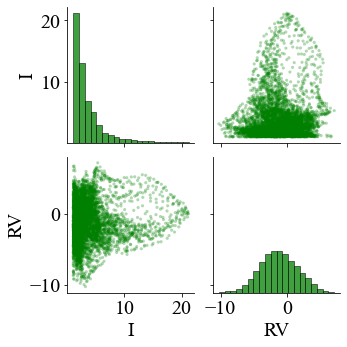

In [10]:
sns.pairplot(data, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none',color='green'),
             diag_kws=dict(bins=20, color="green"),
            )

#plt.savefig('TAURUS/'+reg+'CorrlHA.png')

In [11]:
data.describe()

,Y,X,RV,I
count,5832.000000,5832.000000,5832.000000,5832.000000
mean,120.644719,159.083162,-1.234946,3.741947
std,19.483477,26.602077,2.804594,3.291084
min,80.000000,110.000000,-10.268204,1.078257
25%,105.000000,137.000000,-3.153568,1.752981
50%,119.000000,159.000000,-1.317711,2.530523
75%,136.000000,179.000000,0.691124,4.411604
max,164.000000,220.000000,7.164047,21.159351


Text(0.5, 1.0, 'H$_{α}$ Flux')

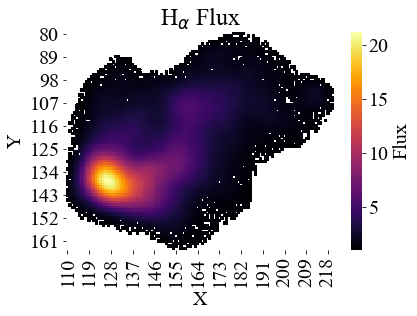

In [12]:
datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
#fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
plt.title('H$_{α}$ Flux')
#plt.savefig('TAURUS/Imgs/A/'+reg+'FH.png')

Text(0.84, 0.08, '20 pc')

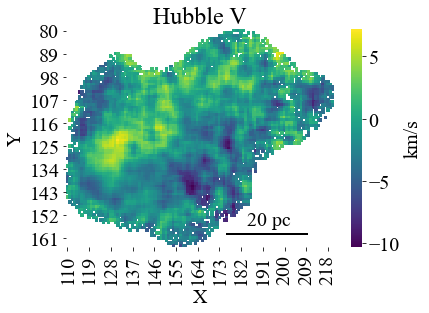

In [13]:
fig = plt.figure()
ax = fig.add_subplot()

datal=data.copy()

dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv, cmap="viridis",cbar_kws={'label': 'km/s'})

plt.title('Hubble V')

plt.axhline(y=80, xmin=0.6, xmax=0.90, linewidth=2, color = 'k')

ax.text(0.84, 0.08, '20 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
#plt.savefig('TAURUS/Imgs/A/'+reg+'RVH.png')

Text(0.5, 17.60000000000001, 'Radial velocity [km/s]')

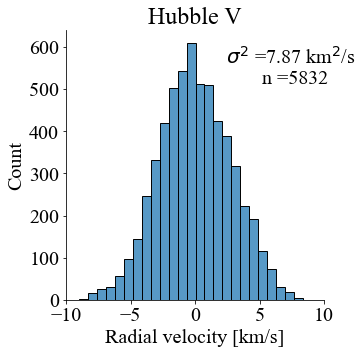

In [14]:
#fig, ax = plt.subplots()

sns.displot(data.RV-data.RV.mean(),bins=25)
plt.xlim(-10,10)

plt.text(0.9, 1.1,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.92, 0.88,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.90, 1.2,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('Hubble V')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="14"

plt.xlabel('Radial velocity [km/s]')


In [15]:
HV = {'HV' : data,
      }
HV

{'HV':          Y    X        RV         I
 20659   80  179  0.155434  1.188447
 20660   80  180 -0.648102  1.201921
 20661   80  181 -1.540916  1.181882
 20662   80  182  0.378639  1.175775
 20663   80  183  0.177757  1.136996
 ...    ...  ...       ...       ...
 41891  163  163 -4.397934  1.102073
 42138  164  154 -5.536270  1.117846
 42141  164  157 -6.362122  1.116007
 42142  164  158 -3.147987  1.158385
 42143  164  159 -3.884567  1.125879
 
 [5832 rows x 4 columns]}

In [16]:
import pickle

f = open('VF\\HV.pkl',"wb")
pickle.dump(data,f)
f.close()

In [17]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 11.32690143585205 seconds ---
